# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[24, 23, 22, ...,  6,  6, 10],
       [81, 41, 56, ..., 81, 96, 75],
       [50, 91, 87, ..., 16,  6, 41],
       ...,
       [86, 11, 23, ..., 43, 89, 78],
       [18, 54, 54, ...,  1, 98, 87],
       [80, 53, 44, ..., 61, 96, 61]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [2]:
rng = np.random.default_rng()

rng.shuffle(A, axis=1)
A

array([[30, 22, 65, ..., 54, 23, 12],
       [84, 80,  9, ...,  6, 58, 51],
       [ 0, 94,  0, ..., 34, 93, 47],
       ...,
       [ 9, 73, 99, ..., 44, 50, 42],
       [ 1, 31, 41, ..., 70, 53, 87],
       [77, 25, 95, ..., 55, 62, 32]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [3]:
A[A[:, ::2].sum(axis=1) > A[:, 1::2].sum(axis=1).mean()]

array([[84, 80,  9, ...,  6, 58, 51],
       [61, 41, 67, ..., 52, 81, 66],
       [15, 62, 60, ..., 91, 44, 20],
       ...,
       [ 9, 73, 99, ..., 44, 50, 42],
       [ 1, 31, 41, ..., 70, 53, 87],
       [77, 25, 95, ..., 55, 62, 32]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [4]:
np.argmax(A.max(axis=1) - A.min(axis=1))

12

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [5]:
A.argsort(axis=None).argsort().reshape(A.shape) + 1

array([[3086, 2281, 6645, ..., 5478, 2345, 1327],
       [8501, 8029,  996, ...,  681, 5891, 5198],
       [   3, 9447,   29, ..., 3490, 9330, 4767],
       ...,
       [ 973, 7356, 9942, ..., 4447, 5126, 4312],
       [ 163, 3190, 4211, ..., 7121, 5406, 8840],
       [7819, 2615, 9558, ..., 5555, 6309, 3303]], dtype=int64)

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [6]:
(A - np.vstack(A.min(axis=1))) / np.vstack(A.max(axis=1) - A.min(axis=1))

array([[0.27956989, 0.19354839, 0.65591398, ..., 0.53763441, 0.20430108,
        0.08602151],
       [0.87368421, 0.83157895, 0.08421053, ..., 0.05263158, 0.6       ,
        0.52631579],
       [0.        , 0.95918367, 0.        , ..., 0.34693878, 0.94897959,
        0.47959184],
       ...,
       [0.01098901, 0.71428571, 1.        , ..., 0.3956044 , 0.46153846,
        0.37362637],
       [0.01010101, 0.31313131, 0.41414141, ..., 0.70707071, 0.53535354,
        0.87878788],
       [0.77419355, 0.21505376, 0.96774194, ..., 0.53763441, 0.61290323,
        0.29032258]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [7]:
A * np.arange(1, 11).reshape(10, 1, 1)

array([[[ 30,  22,  65, ...,  54,  23,  12],
        [ 84,  80,   9, ...,   6,  58,  51],
        [  0,  94,   0, ...,  34,  93,  47],
        ...,
        [  9,  73,  99, ...,  44,  50,  42],
        [  1,  31,  41, ...,  70,  53,  87],
        [ 77,  25,  95, ...,  55,  62,  32]],

       [[ 60,  44, 130, ..., 108,  46,  24],
        [168, 160,  18, ...,  12, 116, 102],
        [  0, 188,   0, ...,  68, 186,  94],
        ...,
        [ 18, 146, 198, ...,  88, 100,  84],
        [  2,  62,  82, ..., 140, 106, 174],
        [154,  50, 190, ..., 110, 124,  64]],

       [[ 90,  66, 195, ..., 162,  69,  36],
        [252, 240,  27, ...,  18, 174, 153],
        [  0, 282,   0, ..., 102, 279, 141],
        ...,
        [ 27, 219, 297, ..., 132, 150, 126],
        [  3,  93, 123, ..., 210, 159, 261],
        [231,  75, 285, ..., 165, 186,  96]],

       ...,

       [[240, 176, 520, ..., 432, 184,  96],
        [672, 640,  72, ...,  48, 464, 408],
        [  0, 752,   0, ..., 272, 744, 376

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [8]:
np.concatenate((A[:, ::2], A[:, 1::2]), axis=1)

array([[30, 65, 72, ..., 51, 54, 12],
       [84,  9, 17, ..., 24,  6, 51],
       [ 0,  0,  3, ..., 31, 34, 47],
       ...,
       [ 9, 99, 78, ..., 42, 44, 42],
       [ 1, 41, 98, ..., 44, 70, 87],
       [77, 95, 88, ..., 27, 55, 32]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [9]:
np.count_nonzero(np.all(A > 5, axis=1))

12

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который состоит из средних этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [10]:
np.array(np.split(A, 10)).mean(axis=0)

array([[62.5, 57.3, 44.3, 47.6, 41. , 36.1, 58.2, 53.5, 56.4, 57.3, 33.8,
        42.4, 53.7, 44.8, 54.9, 63. , 56.9, 41.4, 74.3, 53.1, 55.3, 63.4,
        40.9, 44.8, 47.5, 49.5, 49.4, 47.2, 42.8, 43.4, 37.2, 45.7, 47.9,
        49.9, 46.8, 53.4, 41.8, 39.7, 40.9, 53.3, 44.2, 44. , 49. , 72. ,
        37.3, 30.5, 41.3, 51.9, 39. , 48.4],
       [52.4, 65.1, 51.4, 32.5, 43.5, 50.9, 54.5, 52.4, 42.8, 55.3, 50.2,
        51.5, 42. , 51.7, 44.7, 50.7, 61.3, 63.9, 29.4, 56.8, 34.8, 36. ,
        54.1, 46.1, 58.8, 54.2, 43.8, 46.2, 40.4, 41.3, 43.7, 45.4, 50.1,
        56.4, 59.4, 35. , 45.2, 72.1, 46.2, 43.9, 41.2, 69.2, 39.5, 48.7,
        46. , 45.6, 54.2, 46.5, 48. , 53.1],
       [38.9, 51.8, 42.7, 45.7, 45.1, 42. , 40.2, 40.3, 42.2, 48.1, 43.1,
        44.5, 62.7, 47. , 45.7, 48.5, 61.1, 47. , 44.2, 66.6, 53.5, 50.8,
        46.7, 55. , 39.7, 39.2, 31. , 65.3, 54.5, 54.9, 51.4, 52.7, 52. ,
        53.5, 30.3, 48.2, 49. , 49.4, 38.3, 31.2, 49.1, 56.5, 57.7, 43.2,
        52.5, 34. , 48

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [11]:
u, ind = np.unique(A.flatten(), return_index=True)
u[np.argsort(ind)]

array([30, 22, 65, 72, 19,  8, 57,  6, 74, 10, 67, 54, 12, 73, 48, 81,  4,
       24, 83, 63, 23, 91, 78, 61, 70, 33, 51, 52, 11, 34, 97, 32, 89, 93,
       20, 37, 84, 80,  9, 56, 17, 86,  1,  2, 75, 27, 71, 82, 16, 41, 96,
       35, 38, 66, 21, 26, 87, 36, 58,  0, 94,  3, 25, 90, 47, 55, 43, 49,
       85, 50, 28,  5, 98, 14, 69, 60, 53, 31, 46, 68, 76, 88, 42,  7, 44,
       15, 13, 64, 77, 18, 79, 40, 95, 92, 99, 62, 45, 29, 59, 39])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [12]:
mean = A.mean(axis=0)
np.sqrt(np.sum((A - mean) ** 2, axis=1))

array([197.3205403 , 211.37555588, 217.84325931, 191.7882312 ,
       207.96787162, 186.02442212, 192.81741525, 205.01652525,
       211.51906681, 207.71888606, 192.75890544, 201.6713307 ,
       210.61516001, 203.82354041, 227.19219975, 215.8624924 ,
       205.61010584, 190.81062765, 211.48031971, 222.13810035,
       187.72814287, 208.74315707, 212.19124776, 197.86746985,
       212.52060047, 187.01608387, 201.27519873, 210.55333202,
       202.93727017, 194.07852953, 196.49785145, 194.02779601,
       211.77071475, 170.20653814, 205.84381367, 226.60127013,
       188.82466901, 227.16660323, 199.32173897, 193.22899789,
       174.07319043, 219.21353887, 213.5743562 , 205.13696796,
       216.21164544, 207.35733801, 225.52072105, 195.94490457,
       200.2044096 , 193.01009203, 216.70737326, 195.58815308,
       208.56268992, 188.15101813, 198.02079594, 219.99660367,
       186.45472808, 186.13437518, 197.43291424, 213.10644201,
       201.2338829 , 207.24708834, 209.84910204, 191.32

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [13]:
np.where(A < 50, A * 2, A * 3)

array([[ 60,  44, 195, ..., 162,  46,  24],
       [252, 240,  18, ...,  12, 174, 153],
       [  0, 282,   0, ...,  68, 279,  94],
       ...,
       [ 18, 219, 297, ...,  88, 150,  84],
       [  2,  62,  82, ..., 210, 159, 261],
       [231,  50, 285, ..., 165, 186,  64]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив их размерности нулями справа.

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [14]:
def moving_average(arr, window):
    return np.convolve(arr, np.ones(window), "valid") / window

(moving_average(A.flatten(), 3) + 
np.concatenate((moving_average(A.flatten(), 5), np.zeros(2))) + 
np.concatenate((moving_average(A.flatten(), 10), np.zeros(7))))

array([113.5       , 113.03333333, 125.7       , ..., 103.6       ,
        64.66666667,  49.66666667])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

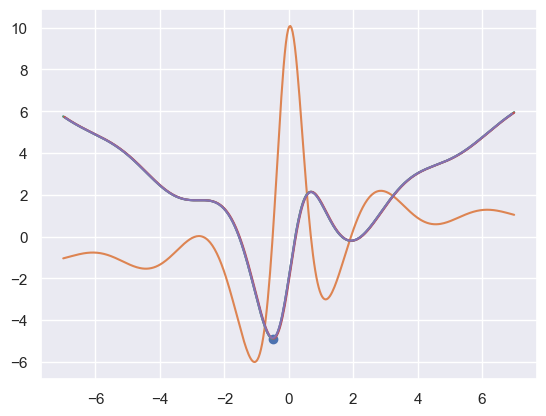

In [15]:
from scipy.misc import derivative
from scipy.optimize import fmin_bfgs

f = lambda x: (5 * np.sin(2 * x) - np.cos(x) ** 2 - 1 + np.abs(x ** 3) - x ** 2) / (x ** 2 + 1)

x = np.linspace(-7, 7, 400)
y = f(x)

plt.plot(x, y)
plt.plot(x, derivative(f, x, dx=1e-6))

min = fmin_bfgs(f, 0, disp=False)
plt.scatter(min, f(min))

plt.plot(x, moving_average(y, 1))
plt.plot(x[1:], moving_average(y, 2))
plt.plot(x[2:-2], moving_average(y, 5))

plt.show()

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [16]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[0, 4, 0, 4, 0]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [17]:
import numpy.typing as npt

def np_sample(x: npt.NDArray[np.int64], c: int) -> npt.NDArray[np.int64]:
    assert x.size > 0

    cumsum = np.cumsum(x)
    val = np.random.rand(c) * np.sum(x)
    res = np.argmax(cumsum > val.reshape(c, 1), axis=1)

    return res

np_sample(np.array([50, 3, 1, 7, 20]), 5)

array([4, 3, 4, 0, 4], dtype=int64)

In [24]:
from scipy.stats import ttest_ind

a = sample([50, 3, 1, 7, 20], 5)
b = np_sample(np.array([50, 3, 1, 7, 20]), 5)

ttest_ind(a, b)

Ttest_indResult(statistic=-0.16783627165933798, pvalue=0.8708773803679531)

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [19]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

1799

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном запусков. 

In [20]:
def np_walk(n: int):
    return np.random.randint(-3, 4, n).sum()

np_walk(10_000)

-92

In [21]:
%timeit walk(10_000)
%timeit np_walk(10_000)

2.55 ms ± 46.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
41 µs ± 172 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<AxesSubplot: ylabel='Density'>

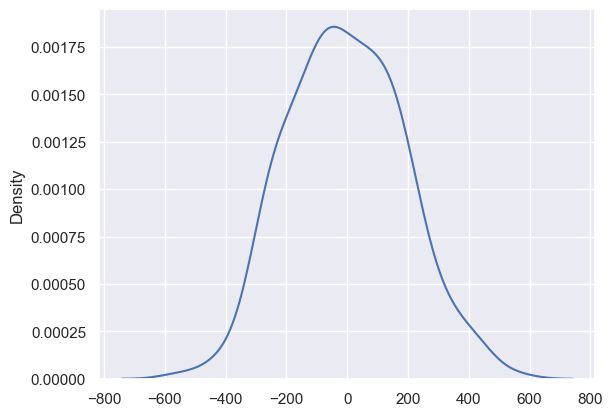

In [22]:
n = 300

res_np_walk = np.zeros(n)

for i in range(n):
    res_np_walk[i] = np_walk(10_000)

sns.kdeplot(data=res_np_walk)

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [23]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


1.3711955999867673

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.